### Relevante pakker

In [9]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [10]:
df_start = pd.read_csv("../resources/lego.population.csv", sep =",", encoding ="latin1")
df_start

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [11]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df_start[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages']]

# fjerner observasjoner med manglende datapunkter
#df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)


#egen rensing av data
df2['Gender'] = np.nan

boy_names = []

with open("../resources/boy_names.txt") as file:
  for index, line in enumerate(file):
    if index < 6:
      continue
    name = line.strip().lower()

    boy_names.append(name)

girl_names = []

with open("../resources/girl_names.txt") as file:
  for index, line in enumerate(file):
    if index < 6:
      continue
    name = line.strip().lower()

    girl_names.append(name)


def inGirlList(set_name):
  for girl in girl_names:
    if str(set_name).find(girl) != -1:
      return "Girl"
  return np.NAN

def inBoyList(set_name):
  for boy in boy_names:
    if str(set_name).find(boy) != -1:
      return "Boy"
  return np.NAN

# Apply the functions to create the 'Gender' column
df2['Gender'] = df2['Set_Name'].apply(lambda x: inGirlList(x) if inGirlList(x) == 'Girl' else inBoyList(x))

themes = dict()


for line in open("../resources/theme_gender.txt"):
  if line.startswith("*") or line.isspace():
    continue
  else:
    words = line.strip().split("=")
    themes[words[0].lower().replace(" ", "")] = words[1].replace(" ", "")

print(themes.keys())


for index, lego_set in df_start.iterrows():
  set_theme = str(lego_set["Theme"]).lower().replace(" ", "")

  if set_theme in themes.keys():
    newValue = int((themes[set_theme]))

    if str(set_theme).__eq__("HarryPotter".lower()):
      print("harry")

    if newValue == 0:
      df2['Gender'][index] = "Neutral"
    elif newValue == 1:
      df2['Gender'][index] = "Boy"
    elif newValue == 2:
      df2['Gender'][index] = "Girl"



df2 = df2.dropna()
#579

df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\2951467681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Theme'] = df2['Theme'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\2951467681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\2951467681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

dict_keys(['batman', 'dc', 'marvel', 'ninjago', 'speedchampions', 'spider-man', 'technic', 'minecraft', 'overwatch', 'starwars', 'hiddenside', 'monkiekid', 'disney', 'dots', 'friends', 'legofrozen2', 'powerpuffgirls', 'unikitty!', 'trollsworldtour', 'legoart', 'architecture', 'brickheadz', 'city', 'classic', 'creator3-in-1', 'creatorexpert', 'duplo', 'juniors', 'legosupermario', 'minifigures', 'minions', 'xtra', 'ideas', 'thelegomovie2', 'harrypotter', 'jurassicworld', 'legobricksketches', 'legoeducation', 'poweredup', 'strangerthings'])
dots
dots
classic
classic
dots
dots
dots
dots
dots
dots
dots
duplo®
duplo®
friends
classic
duplo®
disney
friends
friends
city
unikitty!
ninjago®
ninjago®
disney
duplo®
duplo®
friends
city
city
city
city
city
ninjago®
friends
friends
city
starwars
city
city
city
city
ninjago®
unikitty!
duplo®
city
friends
disney
ninjago®
disney
minecraft
starwars
marvel
marvel
marvel
creator3-in-1
creator3-in-1
batman
classic
marvel
duplo®
disney
city
minecra

,Set_Name,Theme,Pieces,Price,Pages,Gender
2,Creative Blue Bricks,Classic,52.0,4.99,37.0,n
3,Creative Green Bricks,Classic,60.0,4.99,37.0,n
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,g
14,White Baseplate,Classic,1.0,7.99,1.0,n
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,g
...,...,...,...,...,...,...
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,Girl
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,Girl
1175,Monkie Kid's Team Secret HQ,Monkie Kid,1105.0,169.99,556.0,b
1176,Grand Piano,Ideas,3662.0,349.99,564.0,n


### Mer eller mindre relevante kodesnutter

In [12]:
print(df2.mean(numeric_only = True))

Pieces    440.820776
Price      46.720023
Pages     108.113014
dtype: float64


In [13]:
print(df2['Theme'].value_counts())

Theme
Friends              100
City                  94
Star Wars             85
NINJAGO               61
Marvel                50
nan                   40
Creator 3-in-1        38
DUPLO                 34
Disney                33
BrickHeadz            31
Technic               31
THE LEGO MOVIE 2      25
Minecraft             22
Harry Potter          21
Classic               20
Hidden Side           19
Speed Champions       17
Jurassic World        17
Creator Expert        15
Batman                15
Juniors               12
Ideas                 12
Architecture          11
DC                    10
Trolls World Tour      9
Monkie Kid             9
DOTS                   8
LEGO Frozen 2          8
Unikitty               6
Xtra                   4
Powered UP             4
Minifigures            4
Overwatch              4
Powerpuff Girls        2
Minions                2
Spider-Man             2
Stranger Things        1
Name: count, dtype: int64


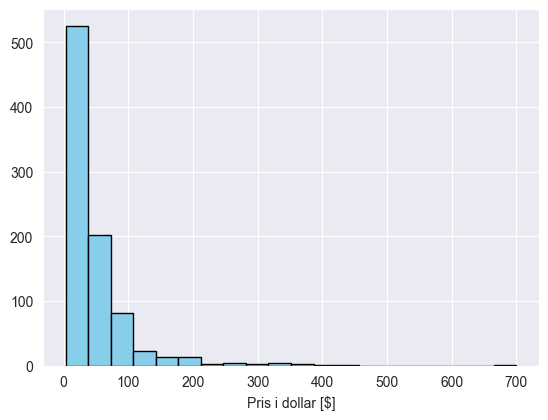

In [14]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

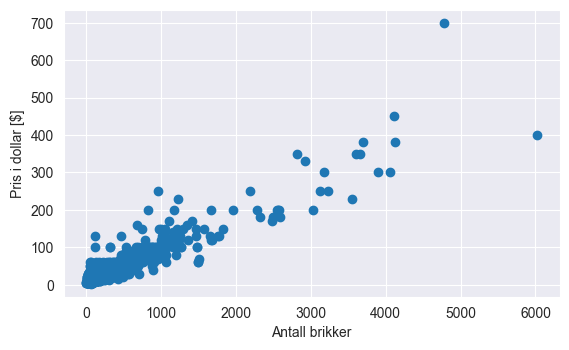

In [15]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [16]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name    Imperial Star Destroyer
Theme                     Star Wars
Pieces                       4784.0
Price                        699.99
Pages                         444.0
Gender                         Girl
Name: 825, dtype: object


In [17]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name    Hogwarts Castle
Theme          Harry Potter
Pieces               6020.0
Price                399.99
Pages                 636.0
Gender                  Boy
Name: 821, dtype: object


In [18]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Xtra            3.990000
Minifigures    10.990000
BrickHeadz     13.731935
Name: Price, dtype: float64

In [19]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Stranger Things    2287.0
Powered UP         2113.5
Creator Expert     1958.8
Name: Pieces, dtype: float64

KeyError: 'Minifigures'

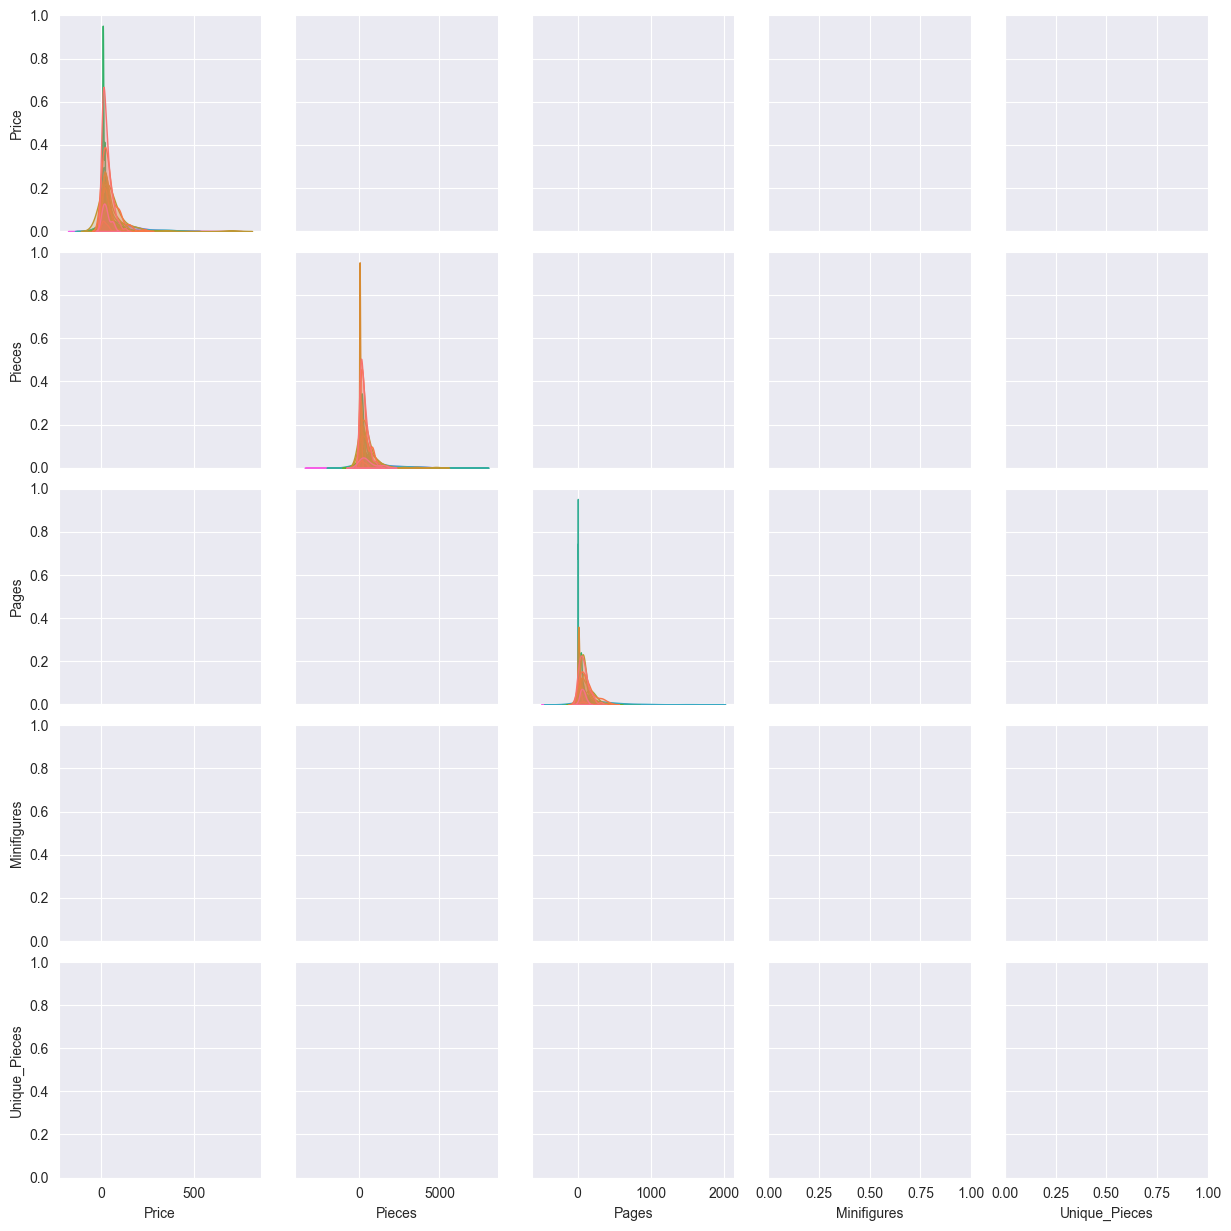

In [20]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon
formel = ' ~ Price'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

print(resultat.summary())

In [ ]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [ ]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [ ]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

In [ ]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [ ]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Theme' , data = subset_df)
modell3_mlr.fit().summary()

In [ ]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

In [ ]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

In [ ]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

In [ ]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')